In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Quantum Coin Flip Circuit:


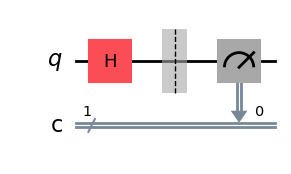


Running quantum simulation jobs...
(1000 jobs with 1024 shots each)


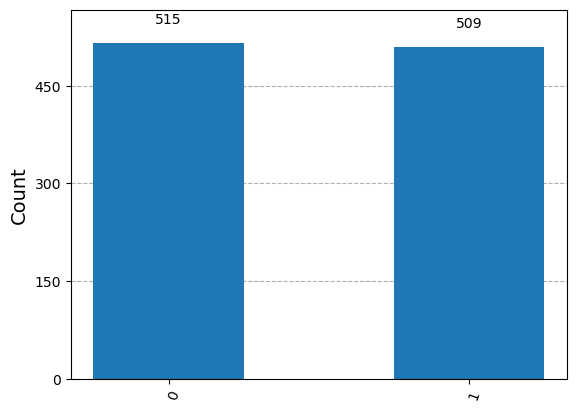


Analysis Results for Tails (1):
mean_success_rate: 50.05%
std_success_rate: 1.60%
min_success_rate: 44.34%
max_success_rate: 54.69%
total_trials: 1000
target_value: 0

Average counts per job:
Average number of heads (0): 511.47
Average number of tails (1): 512.53

Plotting success rate distribution for tails...

Plotting analysis for analyzer 0:

Exporting results...

----------------------------------------
Circuit Complexity Analysis
----------------------------------------

Gate-Based Metrics:


,Metric,Value
0,gate_count,2.0
1,circuit_depth,2.0
2,t_count,0.0
3,cnot_count,0.0
4,two_qubit_count,0.0
5,multi_qubit_ratio,-0.5



Entanglement Metrics:


,Metric,Value
0,entangling_gate_density,0.0
1,entangling_width,1.0



Standardized Metrics:


,Metric,Value
0,circuit_volume,2.0
1,gate_density,1.0
2,clifford_ratio,0.5
3,non_clifford_ratio,-0.5



Advanced Circuit Metrics:


,Metric,Value
0,parallelism_factor,1.00
1,parallelism_efficiency,1.00
2,circuit_efficiency,1.00
3,quantum_resource_utilization,1.25



Derived Complexity Metrics:


,Metric,Value
0,square_ratio,0.5
1,weighted_complexity,11.0
2,normalized_weighted_complexity,11.0



Quantum Volume Estimates:


,Metric,Value
0,Standard Quantum Volume,2.0
1,Enhanced Quantum Volume,3.2



Factors affecting Quantum Volume:


,Factor,Value
0,square_ratio,1.0
1,circuit_density,0.5
2,multi_qubit_ratio,0.0
3,connectivity_factor,0.5
4,enhancement_factor,0.6



Complexity metrics saved to 'flip_coin_complexity_metrics.csv'


{'results_metrics': {'counts': {'1': 512531, '0': 511469}, 'shots': 1024},
 'circuit_metrics': {'depth': 2,
  'width': 2,
  'size': 2,
  'count_ops': OrderedDict([('h', 1), ('barrier', 1), ('measure', 1)]),
  'num_qubits': 1,
  'num_clbits': 1,
  'num_ancillas': 0,
  'num_parameters': 0,
  'has_calibrations': False,
  'has_layout': False},
 'complexity_metrics': {'gate_based_metrics': {'gate_count': 2,
   'circuit_depth': 2,
   't_count': 0,
   'cnot_count': 0,
   'two_qubit_count': 0,
   'multi_qubit_ratio': -0.5},
  'entanglement_metrics': {'entangling_gate_density': 0.0,
   'entangling_width': 1},
  'standardized_metrics': {'circuit_volume': 2,
   'gate_density': 1.0,
   'clifford_ratio': 0.5,
   'non_clifford_ratio': -0.5},
  'advanced_metrics': {'parallelism_factor': 1.0,
   'parallelism_efficiency': 1.0,
   'circuit_efficiency': 1.0,
   'quantum_resource_utilization': 1.25},
  'derived_metrics': {'square_ratio': 0.5,
   'weighted_complexity': 11,
   'normalized_weighted_complexit

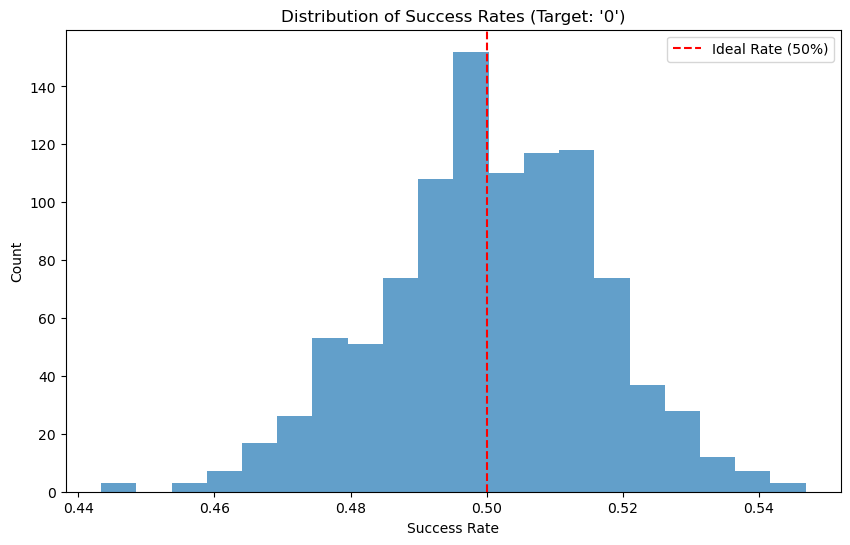

In [5]:
from qiskit_qward.examples.flip_coin.run import run_simulation_analysis

run_simulation_analysis()

In [3]:
# Cell 6 - Run on IBM Quantum Hardware
print("\nRunning on IBM Quantum Hardware...")
print("(Single job with 1024 shots)")

# Create a new scanner for IBM run to keep results separate
ibm_scanner = ScanningQuantumFlipCoin(use_barriers=True)

# Run on IBM with a single job
ibm_results = ibm_scanner.run_on_ibm()

if ibm_results["status"] == "completed":
    print(f"\nBackend used: {ibm_results['backend']}")
    print(f"Job ID: {ibm_results['job_id']}")

    print("\nResults from IBM Quantum:")
    counts = ibm_results["counts"]
    total_shots = sum(counts.values())
    heads = counts.get("0", 0)
    tails = counts.get("1", 0)

    print(f"Total shots: {total_shots}")
    print(f"Heads (0): {heads} ({heads/total_shots:.2%})")
    print(f"Tails (1): {tails} ({tails/total_shots:.2%})")

    # Compare with simulation averages
    print("\nComparison with simulation averages:")
    print(f"Simulation - Tails rate: {analysis['average_counts']['tails']/1024:.2%}")
    print(f"IBM Q     - Tails rate: {tails/total_shots:.2%}")
else:
    print(f"\nIBM Quantum execution failed:")
    print(f"Status: {ibm_results['status']}")
    if "error" in ibm_results:
        print(f"Error: {ibm_results['error']}")


Running on IBM Quantum Hardware...
(Single job with 1024 shots)
Using backend: ibm_sherbrooke
Pending jobs: 44
>>> Job ID: czp5w78d8drg008gakg0
>>> Job Status: QUEUED
>>> Compilation time: 5.392 seconds
>>> Job Status: QUEUED (Poll #1)
>>> Job Status: QUEUED (Poll #2)
>>> Job Status: QUEUED (Poll #3)
>>> Job Status: QUEUED (Poll #4)
>>> Job Status: QUEUED (Poll #5)
>>> Job Status: QUEUED (Poll #6)
>>> Job Status: QUEUED (Poll #7)
>>> Job Status: QUEUED (Poll #8)
>>> Job Status: QUEUED (Poll #9)
>>> Job Status: QUEUED (Poll #10)
>>> Job Status: QUEUED (Poll #11)
>>> Job Status: QUEUED (Poll #12)
>>> Job Status: QUEUED (Poll #13)
>>> Job Status: QUEUED (Poll #14)
>>> Job Status: QUEUED (Poll #15)
>>> Job Status: QUEUED (Poll #16)
>>> Job Status: QUEUED (Poll #17)
>>> Job Status: QUEUED (Poll #18)
>>> Job Status: QUEUED (Poll #19)
>>> Job Status: QUEUED (Poll #20)
>>> Job Status: QUEUED (Poll #21)
>>> Job Status: QUEUED (Poll #22)
>>> Job Status: QUEUED (Poll #23)
>>> Job Status: QUEUED 